# AVIATION ACCIDENT DATA ANALYSIS

### Aviation Industry and Problem statement

Statistically, aviation accidents remain relatively rare, but the consequences are often catastrophic, leading to loss of life, financial liability, and reputational damage. Common causes of aviation accidents include human error, mechanical failures, poor weather conditions, and, increasingly, cybersecurity threats. These issues, combined with aging aircraft fleets and lapses in maintenance practices, present key challenges for the industry.

Aviation accident data is analyzed to identify patterns, causes, and areas for improvement in safety protocols, helping to prevent future accidents. Data analysis offers critical insights into factors such as the frequency of accidents related to specific aircraft models, manufacturers, or operational conditions. It enables companies to make informed decisions when purchasing aircraft, prioritizing those with proven safety records. Moreover, data analysis highlights recurring issues like mechanical failures, human errors, or environmental factors, allowing stakeholders to implement targeted safety measures.

Historically, certain aircraft models have exhibited higher accident rates. For instance, older models like the McDonnell Douglas DC-10 experienced multiple accidents due to design flaws, particularly in the cargo door, which led to several fatal crashes in the 1970s. Other models, such as the Boeing 737 Max, were grounded globally following two crashes (Lion Air Flight 610 and Ethiopian Airlines Flight 302) linked to the Maneuvering Characteristics Augmentation System (MCAS), a software failure that caused uncommanded nosedives (Nicas, 2019).

Empirical evidence shows that human error is the leading cause of aviation accidents, accounting for about 70% of incidents (Shappell & Wiegmann, 2012). Mechanical issues, while less common, also contribute significantly, particularly when maintenance protocols are inadequate. Weather conditions and, more recently, cyber threats have also emerged as concerns. Thus, analyzing aviation data helps identify these risk factors and ensures that preventative actions are taken to enhance safety.

For this purpose, this analysis will help a company venturing into Air Transport Business, make informed decisions in purchasing the most suitable low risk aircrafts for both its Commercial and Private Flight service provision including operational guidance on how to navigate the avaiation accident and incident issues.

### References
Nicas, J. (2019). Boeing 737 Max Crashes: A Timeline of the Troubles. The New York Times. Retrieved from https://www.nytimes.com

Shappell, S., & Wiegmann, D. (2012). A human error approach to aviation accident analysis: The human factors analysis and classification system. Ashgate Publishing, Ltd

# Preliminaries
This Analysis will be guided by CRISP-DM Standards for Data Science and Python PEP 8 for Programming in Python

# Import Python libraries to use

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the data file

In [3]:
# Specify encoding as per PEP-8. When the modern 'utf-8' is used, it throws `UnicodeDecodeError` when the standard 'utf-8' is used thus 'ISO-8859-1, otherwise also known as 'latin-1' encoding is used instead.
df = pd.read_csv('AviationData.csv', encoding= 'latin-1')


c:\Users\Pc\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Exploring the Data Frame

In [4]:
df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

# Understanding the key aviation terminologies used in aircraft accident investigations and data fields in this Data Frame

#### `Event.Id`: A unique identifier assigned to this specific aviation event.
#### `Investigation.Type`: Whether this is classified as an accident, incident/near misses, or another type of event.
#### `Accident.Number`: An assigned reference number for this particular accident (if applicable).
#### `Event.Date`: The date the aviation event occurred
#### `Country`: The country where the event occurred.
#### `Latitude/Longitude`: Specific geographic coordinates of the event.
#### `Airport.Code/Name`: The airport code and name (if applicable) near the event location.
#### `Injury.Severity`: Classification of injuries sustained (e.g., fatal, serious, minor, uninjured).
#### `Aircraft.damage`: Extent of damage sustained by the aircraft.Aircraft.Category: Type of aircraft (e.g., transport, utility, etc.).
#### `Registration.Number`: Unique identification number assigned to the aircraft.
#### `Make/Model`: Manufacturer and model of the aircraft.
#### `Amateur.Built`: Whether the aircraft is an amateur-constructed plane.
#### `Number.of.Engines/Engine.Type`: Number and type of engines on the aircraft.
#### `FAR.Description`: Reference to the relevant Federal Aviation Regulation (if applicable).
#### `Schedule/Purpose.of.flight`: Whether the flight was scheduled, and its intended purpose.
#### `Air.carrier`: Name of the airline involved (if applicable).
#### `Total Injury Counts`: Numbers of fatalities, serious injuries, minor injuries, and uninjured people.
#### `Weather.Condition`: Description of the weather conditions at the time of the event.
#### `Broad.phase.of.flight`: Stage of the flight during which the event occurred (e.g., takeoff, en route, landing).
#### `Report.Status`: Current status of the accident investigation report (e.g., draft, final, published).
#### `Publication.Date`: Date the final accident investigation report was published (if applicable).

# Data Cleaning
#### 1. Refine headers by string replacement method to align with PEP 8 Camel styple of labeling
#### 2. Filter and analyze data only where the `Report.Status` is conclusive
#### 3. Cast data types on key columns with numerical, date and text values or a mixture of all
#### 4. Fill missing values accordingly (Event data is best lefy as NaN for numerical fields because zeros are significant and 'Unknown' for text fields requiring facts but are not available)
#### 5. Drop Duplicates


# New Columns/Features to be created
#### 1. total_souls = Total.Fatal.Injuries + Total.Serious.Injuries + Total.Minor.Injuries + Total.Uninjured
#### 2. total_injuries = Total.Fatal.Injuries + Total.Serious.Injuries + Total.Minor.Injuries 
#### 2. Split Location Column into City and State (abbreviated)
#### 3. Split Injury.severity Column into `Injury_Severity` and `Degree_Of_Fatality`
#### 4. fatality_rate = (total_injuries/total_souls)

# Data Frame Transformation Codes

In [8]:
# Replace '.' with '_' in column names of aviation_data_df
df.columns = df.columns.str.replace('.', '_', regex=False)

In [9]:
# Convert column names to title case to standardize labels
df.columns = df.columns.str.title()


In [10]:
# Remove any trailing white spaces in all columns
df.columns = df.columns.str.strip() 

In [11]:
#Format `Event_Date`as date
date_columns = ['Event_Date', 'Publication_Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [12]:
# Fill the missing Date values with "Unknown"
for col in date_columns:
    df[col] = df[col].replace('nan', 'Unknown')

In [13]:
#Format 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured' columns as numerical values, and replacing non-numeric values with NaN
numerical_columns = ['Number_Of_Engines' , 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']

#Use For loop to loop through the series/feature/column and format to number and where there are errors, coerce.
for col in numerical_columns:
  df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
#Fill numerical missing values in 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured' columns above with Zeros using For loop

fill_zero_columns = ['Number_Of_Engines' , 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']
for col in fill_zero_columns:
    df[col] = df[col].fillna(0)

In [15]:
# Split the `Location` column into `City` and `State`

df[['City', 'State']] = df['Location'].str.split(', ', n=1, expand=True)

In [16]:
# Splitting the 'Injury_Severity' column so as to have the numbers in the brackes as the 'Degree_Of_Fatality' in a separate column
# Extract the degree of fatality (numbers within brackets) using regular expressions (regex) for string manipulation in Pandas. 
# We will use the extract() and replace() regular expressions. We will also just make sure that the column is formatted as string

df['Degree_Of_Fatality'] = df['Injury_Severity'].astype(str).str.extract(r'\((\d+)\)')

# Remove the brackets and numbers from the original column
df['Injury_Severity'] = df['Injury_Severity'].astype(str).str.replace(r'\(\d+\)', '', regex=True)

In [17]:
#Use For loop to loop through the series/feature/column using Pandas `to_numeric` module/function and format to number and where there are errors, coerce/force casting.

degree_fatality = ['Degree_Of_Fatality']
for col in degree_fatality:
  df[col] = pd.to_numeric(df[col], errors='coerce')

In [18]:
#Standardize the text entries into sentense case
standardize_columns = ['Country','Airport_Name', 'Injury_Severity', 'Aircraft_Damage','Aircraft_Category', 'Make', 'Model','Amateur_Built', 'Far_Description','Schedule', 'Purpose_Of_Flight', 'Air_Carrier' , 'Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status','City']

#First convert them to string
for col in standardize_columns:
    df[col] = df[col].astype(str)

In [19]:
# Loop through the columnns and format to sentense case, where string values are

for col in standardize_columns:
    df[col] = df[col].apply(lambda x: x.capitalize() if isinstance(x, str) else x)

In [20]:
# Replace 'ukn' or 'unk' with 'Unknown', but avoid replacing existing 'Unknown'. Use replace() syntax to replace specific Texts
for col in standardize_columns:
    df[col] = df[col].replace(r'\b(Ukn|Unk|Unavailable)\b', 'Unknown', regex=True)

In [21]:
# Fill the missing values with "Unknown"
for col in standardize_columns:
    # Replace 'ukn' or 'unk' with 'Unknown', but avoid replacing existing 'Unknown'. Use replace() syntax to replace specific Texts
    df[col] = df[col].replace(r'\b(Nan|NaN)\b', 'Unknown', regex=True)

In [22]:
df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date,City,State,Degree_Of_Fatality
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United states,NaN,NaN,NaN,Unknown,...,0.0,0.0,0.0,Unknown,Cruise,Probable cause,NaT,Moose creek,ID,2.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United states,NaN,NaN,NaN,Unknown,...,0.0,0.0,0.0,Unknown,Unknown,Probable cause,1996-09-19,Bridgeport,CA,4.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United states,36.9222,-81.8781,NaN,Unknown,...,0.0,0.0,0.0,Imc,Cruise,Probable cause,2007-02-26,Saltville,VA,3.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United states,NaN,NaN,NaN,Unknown,...,0.0,0.0,0.0,Imc,Cruise,Probable cause,2000-12-09,Eureka,CA,2.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United states,NaN,NaN,NaN,Unknown,...,2.0,0.0,0.0,Vmc,Approach,Probable cause,1980-04-16,Canton,OH,1.0


In [23]:
# Drop duplicates based on 'Event_Id', expected to be unique
df = df.drop_duplicates(subset=['Event_Id']).copy()

In [24]:
# Calculate `Total_Souls`
df['Total_Souls'] = df['Total_Fatal_Injuries'] + df['Total_Serious_Injuries'] + df['Total_Minor_Injuries'] + df['Total_Uninjured']


In [25]:
# Calculate `Total_Injuries`
df['Total_Injuries'] = df['Total_Souls'] - df['Total_Uninjured']

In [26]:
# Calculate `Fatality_Rate`
df['Fatality Rate'] = (df['Total_Fatal_Injuries'] / df['Total_Souls'] * 100).round(1)

In [27]:
# Write the cleaned dataframe to a CSV file, drop pd index in the export
#df.to_csv("AviationData_cleaned.csv", index=False)

# Exploratory Data Analysis (EDA)

### EDA questions

### 1. Aircraft Models and Accidents
##### Which aircraft models are involved in the highest number of accidents or incidents?
##### Which aircraft models report the fewest accidents?
##### Why? 
###### To understand which manufacturers have the most incidents.
###### To explore injury patterns across different makes, such as Boeing vs. Zwicker Murray R.
### Accidents by Aircraft Make
##### What is the distribution of accidents by aircraft make (e.g., Boeing, Cessna)?
##### Which aircraft manufacturers have the highest and lowest injury rates?
### 2. Private vs. Commercial Flights
##### What is the breakdown of accidents between private and commercial flights?
##### Which private and commercial aircraft models are involved in the highest number of accidents?
##### Why?
###### To compare accident rates between these two categories.
### 3. Injuries and Fatalities
##### Which aircraft models or manufacturers have the highest number of injuries or fatalities?
##### Which aircraft models record the fewest injuries or fatalities?
##### Why?
###### Focusing on models for fatalities and injury rates.
### 4. Engine Type
##### What is the relationship between engine type (Reciprocating, Turbo, etc) and accidents or incidents?
##### Which engine types are associated with the highest or lowest injury rates?
##### Why?
###### To explore what types of engines are involved in more accidents than others.
### 5. Phases of Flight
##### In which phases of flight (Takeoff, Cruise, Landing) do most accidents occur?
##### Do certain aircraft models have a higher incident rate during specific phases of flight?
##### Why?
###### To identify risk phases, for aircraft make and models during takeoff, landing or cruise phases.
### 6. Weather Conditions
##### How do weather conditions affect accident severity (non-fatal vs. fatal, substantial damage vs. destruction)?
##### Why?
###### To assess the impact of visibility on accident outcomes and the aircrafts most and least involved in accidents.
### 7. Geographic Distribution
##### Which locations (cities, states, countries) have the highest and lowest number of accidents?
##### Are there specific airports or regions with more frequent accidents?
##### Why?
###### Understand distribution of accidents by locations. Also understand whether other factors like weather condition or broad of phase influence accident outcomes and the aircrafts involved
### 8. Fatal vs. Non-Fatal Incidents
##### What proportion of accidents are fatal vs. non-fatal?
##### Which aircraft models or incidents have the highest fatality rates?
##### Why?
###### To quantify fatality rates across the dataset and identify aircrafts with better survival rates.
### 9. Number of Engines
##### Is there a correlation between the number of engines (one or two) and fatality rates?
##### Why?
###### To determine iwhether the aircraft make, model and number of engines have a bearing on fatalities.

## EDA Codes

### Descriptive statistics

#### Mean, Median, Mode

In [28]:
# We retained the missing values in this dataset as zero(0) is a significant value especially in aviation accidents. Missing values should be captured as such because they point to data unavailability. 
# We are going to ignore them especially in numerical calculations

# Mean
mean_values = df[['Total_Souls', 'Total_Injuries', 'Total_Fatal_Injuries']].astype(float).mean(skipna=True)

# Median
median_values = df[['Total_Souls', 'Total_Injuries', 'Total_Fatal_Injuries']].astype(float).median(skipna=True)

# Mode: Where multiple values are returned, the first occurrence is taken
mode_values = df[['Total_Souls', 'Total_Injuries', 'Total_Fatal_Injuries', 'Make', 'Model','Location', 'Weather_Condition']].mode(dropna=True).iloc[0]

# Display results
print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nMode Values:\n", mode_values)

Mean Values:
 Total_Souls             5.849632
Total_Injuries          1.102080
Total_Fatal_Injuries    0.552421
dtype: float64

Median Values:
 Total_Souls             2.0
Total_Injuries          0.0
Total_Fatal_Injuries    0.0
dtype: float64

Mode Values:
 Total_Souls                         1
Total_Injuries                      0
Total_Fatal_Injuries                0
Make                           Cessna
Model                             152
Location                ANCHORAGE, AK
Weather_Condition                 Vmc
Name: 0, dtype: object


### Summary General descriptive Observations about this Data frame
Most aircrafts involved in the reported accidents and incidents carry about 6 souls on average but mostly 1 person (pointing to potential several private aircrafts being flown in general) with 2 total injuries for every accidents where the total souls are more than 1 person. Majority of the times, there are no injuries or fatalities but could also mean that data is missing (Mode 0). In most cases, the data was missing. At least 1 person dies in every accident and most accidents reported involved a `Cessna` Make of an aircraft, especially `Cessna 152` model in `VMC` weather condition, mostly in airports in Anchorage, Alaska.

# Other Deep Dive Analytics

### 1. Lets get the accidents and injuries by aircraft `Make` and `Model`

#### Thinking through the codes: 
We need codes that 
- takes the `Make` and `Model` of the aircrafts and counts occurrence events and groups them by those parameters
- sorts the two columns in descending and picks top 5 and bottom 5 in each case for accident events and total injuries
- vary with various variables/features/columns.
- applies our analysis logic


In [29]:
# use Pandas size(), `nlargest()`. We reset index each time once we build the first code, we copy-paste and modify depending on the logic

# Count accidents by 'Make' and 'Model'.
aircraft_accidents = df.groupby(['Make', 'Model']).size().reset_index(name='Accident_Count')

# Get top 5 aircraft with the most accidents
top_5_most_accidents = aircraft_accidents.nlargest(5, 'Accident_Count')

# Get top 5 aircraft with the least accidents (removing those with zero counts)
top_5_least_accidents = aircraft_accidents[aircraft_accidents['Accident_Count'] > 0].nsmallest(5, 'Accident_Count')


print("Top 5 Aircraft (Make & Model) with most accidents and incidents:") 
print(top_5_most_accidents)

print("\nTop 5 Aircraft (Make & Model) with least accidents and incidents:") # Use "\n" to go to a new line to space up the output being printed for better reading
print(top_5_least_accidents)

Top 5 Aircraft (Make & Model) with most accidents and incidents:
         Make      Model  Accident_Count
4575   Cessna        152            2312
4599   Cessna        172            1740
4650   Cessna       172n            1143
13324   Piper  Pa-28-140             925
4548   Cessna        150             820

Top 5 Aircraft (Make & Model) with least accidents and incidents:
                       Make              Model  Accident_Count
0  107.5 flying corporation  One design dr 107               1
1                      1200               G103               1
2                 177mf llc     Pitts model 12               1
3          1977 colfer-chan      Steen skybolt               1
4                1st ftr gp     Focke-wulf 190               1


In [30]:
# Top 5 accidents by aircraft purpose of flight. Modify above code for this logic
events_by_purpose = df.groupby(['Purpose_Of_Flight']).size()
sort_events_by_purpose = events_by_purpose.sort_values(ascending=False)
print(sort_events_by_purpose.head(5))

Purpose_Of_Flight
Personal              49076
Unknown               12731
Instructional         10442
Aerial application     4686
Business               3971
dtype: int64


In [31]:
# Sum of injuries by 'Make' and 'Model'
accidents_by_make_model = df.groupby(['Make', 'Model'])['Total_Injuries'].sum().reset_index(name='Total_Injuries_Sum')

# Sort by 'Total_Injuries_Sum' in descending order
sorted_accidents = accidents_by_make_model.sort_values(by='Total_Injuries_Sum', ascending=False)

# Top 5 and Bottom 5 aircraft by total injuries
top_5_accidents = sorted_accidents.head(5)
bottom_5_accidents = sorted_accidents.tail(5)

# Print results
print("Top 5 Aircraft with most injuries:")
print(top_5_accidents)
print("\nBottom 5 Aircraft with least injuries:")
print(bottom_5_accidents)

Top 5 Aircraft with most injuries:
         Make      Model  Total_Injuries_Sum
3153   Boeing        737              1827.0
4599   Cessna        172              1083.0
3189   Boeing    737-200              1064.0
13324   Piper  Pa-28-140               977.0
4575   Cessna        152               954.0

Bottom 5 Aircraft with least injuries:
                   Make       Model  Total_Injuries_Sum
12652             Olson  Mini-plane                 0.0
12651             Olson   Kitfox ii                 0.0
5888    Corben baby ace           D                 0.0
5889             Corbin    Baby ace                 0.0
18166  Zwicker murray r     Glastar                 0.0


In [32]:
# Sum of injuries by 'Make' and 'Model'
accidents_by_make_model = df.groupby(['Make', 'Model'])['Total_Fatal_Injuries'].sum().reset_index(name='Total_Fatal_Injuries_Sum')

# Sort by 'Total_Injuries_Sum' in descending order
sorted_accidents = accidents_by_make_model.sort_values(by='Total_Fatal_Injuries_Sum', ascending=False)

# Top 5 and Bottom 5 aircraft by total injuries
top_5_accidents = sorted_accidents.head(5)
bottom_5_accidents = sorted_accidents.tail(5)

# Print results
print("Top 5 Aircraft with most fatal injuries:")
print(top_5_accidents)
print("\nBottom 5 Aircraft with fatal least injuries:")
print(bottom_5_accidents)

Top 5 Aircraft with most fatal injuries:
        Make      Model  Total_Fatal_Injuries_Sum
3153  Boeing        737                    1348.0
3189  Boeing    737-200                     906.0
3437  Boeing  777 - 206                     534.0
3587  Boeing      Md-82                     403.0
4650  Cessna       172n                     402.0

Bottom 5 Aircraft with fatal least injuries:
                       Make      Model  Total_Fatal_Injuries_Sum
9710         Hyde william r  Helicycle                       0.0
9711   Hélicoptères guimbal   Cabri g2                       0.0
3544                 Boeing   B747-436                       0.0
9713          I.c.a. brasov   Is-28-b2                       0.0
18166      Zwicker murray r    Glastar                       0.0


#### Observation: 
##### 1. `Cessna`, especially `Cessna 152` model has the highest number of accidents and incidents.
##### 2. `1st ftr gp` and especially `1st ftr gp, Focke-wulf 190 ` appears to be the safest aircraft generally 
##### 3. `Private Aircrafts` are the leading in accidents and incidents reported and investigated. The `Commercial Aircrafts` are also in top 5 types that report many accidents and incidents
##### 4. `Boeing` make of the Aircrafts and especially `Boeing 737` leads in total injuries and total fatal injuries reported and investigated. Generally the top 5 aircrafts recording most injuries from accidents are from `Boeing` aircraft manufacturing company.
##### 5. `Zwicker murray r` and especially  `Zwicker murray r, Glastar` model of aircrafts record the least injuries from accident 

### 2. Next we look at the various ways we show the accidents and injuries based on `Purpose of Flight` which will segment the aircrafts reporting accidents and incidents by flight type. We focus on `Private` and `Commercial` Flights for our analysis because those are key areas of air transport that will interest our Company

In [33]:
# Count accidents by 'Make' and 'Purpose_Of_Flight'
accidents_by_make_flight_purpose = df.groupby(['Make','Purpose_Of_Flight']).size().reset_index(name='Accident_Count')

# Sort by 'Purpose_Of_Flight' and 'Accident_Count' in descending order
sorted_accidents_make = accidents_by_make_flight_purpose.sort_values(by=['Purpose_Of_Flight', 'Accident_Count'], ascending=[True, False])

# Top 5 aircraft by flight purpose (commercial and private)
top_accidents_make = sorted_accidents_make.groupby('Purpose_Of_Flight').head(5)

# Bottom 5 aircraft by flight purpose (commercial and private)
bottom_accidents_make = sorted_accidents_make.groupby('Purpose_Of_Flight').tail(5)

# Filter for specific purposes
top_commercial_make = top_accidents_make[top_accidents_make['Purpose_Of_Flight'] == 'Business']
top_private_make = top_accidents_make[top_accidents_make['Purpose_Of_Flight'] == 'Personal']

bottom_commercial_make = bottom_accidents_make[bottom_accidents_make['Purpose_Of_Flight'] == 'Business']
bottom_private_make = bottom_accidents_make[bottom_accidents_make['Purpose_Of_Flight'] == 'Personal']

# Print results
print("Top 5 Commercial Aircraft with most accidents and incidents:")
print(top_commercial_make)
print("\nTop 5 Private Aircraft with most accidents and incidents:")
print(top_private_make)

print("\nBottom 5 Commercial Aircraft with least accidents and incidents:")
print(bottom_commercial_make)
print("\nBottom 5 Private Aircraft with least accidents and incidents:")
print(bottom_private_make)

Top 5 Commercial Aircraft with most accidents and incidents:
        Make Purpose_Of_Flight  Accident_Count
1753  Cessna          Business            1336
6762   Piper          Business             800
940    Beech          Business             478
984     Bell          Business             170
6121  Mooney          Business              98

Top 5 Private Aircraft with most accidents and incidents:
          Make Purpose_Of_Flight  Accident_Count
1761    Cessna          Personal           15723
6769     Piper          Personal            9701
947      Beech          Personal            3282
6125    Mooney          Personal            1100
1062  Bellanca          Personal             746

Bottom 5 Commercial Aircraft with least accidents and incidents:
                          Make Purpose_Of_Flight  Accident_Count
9249         Wheeler acft. co.          Business               1
9251  Wheeler technology, inc.          Business               1
9442                       Wsk          Bus

In [34]:
# Sum of injuries by 'Make' and 'Purpose_Of_Flight'
injuries_by_make_flight_purpose = df.groupby(['Make', 'Purpose_Of_Flight'])['Total_Injuries'].sum().reset_index(name='Total_Injuries_Sum')

# Sort by 'Purpose_Of_Flight' and 'Total_Injuries_Sum' in descending order
sorted_accidents_make = injuries_by_make_flight_purpose.sort_values(by=['Purpose_Of_Flight', 'Total_Injuries_Sum'], ascending=[True, False])

# Top 5 aircraft by flight purpose (commercial and private)
top_accidents_make = sorted_accidents_make.groupby('Purpose_Of_Flight').head(5)

# Bottom 5 aircraft by flight purpose (commercial and private)
bottom_accidents_make = sorted_accidents_make.groupby('Purpose_Of_Flight').tail(5)

# Filter for specific purposes
top_commercial_make = top_accidents_make[top_accidents_make['Purpose_Of_Flight'] == 'Business']
top_private_make = top_accidents_make[top_accidents_make['Purpose_Of_Flight'] == 'Personal']

bottom_commercial_make = bottom_accidents_make[bottom_accidents_make['Purpose_Of_Flight'] == 'Business']
bottom_private_make = bottom_accidents_make[bottom_accidents_make['Purpose_Of_Flight'] == 'Personal']

# Print results
print("Top 5 Commercial Aircraft with most injuries:")
print(top_commercial_make)
print("\nTop 5 Private Aircraft with most injuries:")
print(top_private_make)

print("\nBottom 5 Commercial Aircraft with least injuries:")
print(bottom_commercial_make)
print("\nBottom 5 Private Aircraft with least injuries:")
print(bottom_private_make)

Top 5 Commercial Aircraft with most injuries:
        Make Purpose_Of_Flight  Total_Injuries_Sum
1753  Cessna          Business              1279.0
6762   Piper          Business               877.0
940    Beech          Business               535.0
984     Bell          Business               218.0
6121  Mooney          Business                88.0

Top 5 Private Aircraft with most injuries:
          Make Purpose_Of_Flight  Total_Injuries_Sum
1761    Cessna          Personal             12402.0
6769     Piper          Personal              9114.0
947      Beech          Personal              3804.0
6125    Mooney          Personal              1095.0
1062  Bellanca          Personal               562.0

Bottom 5 Commercial Aircraft with least injuries:
                              Make Purpose_Of_Flight  Total_Injuries_Sum
8719  Thunder & colt airborne amer          Business                 0.0
8982             Vans aircraft inc          Business                 0.0
8985           V

#### Observation: 
##### 6. `Cessna` has the highest number of accidents and incidents including total injries reported both for Private and Commercial flights.
##### 7. `Yuneec` for commercial flights and  `Zwicker murray r ` make for private flights record the least accidents

In [35]:
# Count accidents by 'Make', 'Model', and 'Purpose_Of_Flight'
accidents_by_flight_purpose = df.groupby(['Make', 'Model', 'Purpose_Of_Flight']).size().reset_index(name='Accident_Count')

# Sort by 'Purpose_Of_Flight' and 'Accident_Count' in descending order
#Specify how to sort for each. To improve the view  we sort purpose of flight ascending so that we see most and least counts of commercial aircrafts ('Business') first then the grouping by private aircrafts ('Personal')
sorted_accidents = accidents_by_flight_purpose.sort_values(by=['Purpose_Of_Flight', 'Accident_Count'], ascending=[True, False]) 

# Top 5 aircraft by flight purpose (commercial and private)
top_accidents = sorted_accidents.groupby('Purpose_Of_Flight').head(5)

# Bottom 5 aircraft by flight purpose (commercial and private)
bottom_accidents = sorted_accidents.groupby('Purpose_Of_Flight').tail(5)

# Filter for specific purposes
top_commercial = top_accidents[top_accidents['Purpose_Of_Flight'] == 'Business']
top_private = top_accidents[top_accidents['Purpose_Of_Flight'] == 'Personal']

bottom_commercial = bottom_accidents[bottom_accidents['Purpose_Of_Flight'] == 'Business']
bottom_private = bottom_accidents[bottom_accidents['Purpose_Of_Flight'] == 'Personal']

# Print results
print("Top 5 Commercial Aircraft with most accidents and incidents:")
print(top_commercial)
print("\nTop 5 Private Aircraft with most accidents and incidents:")
print(top_private)

print("\nBottom 5 Commercial Aircraft with least accidents and incidents:")
print(bottom_commercial)
print("\nBottom 5 Private Aircraft with least accidents and incidents:")
print(bottom_private)


Top 5 Commercial Aircraft with most accidents and incidents:
         Make  Model Purpose_Of_Flight  Accident_Count
2806    Beech    A36          Business              60
8322   Cessna  T210n          Business              52
18114   Piper  Pa-18          Business              52
3706     Bell   206b          Business              43
6870   Cessna    182          Business              36

Top 5 Private Aircraft with most accidents and incidents:
         Make      Model Purpose_Of_Flight  Accident_Count
6552   Cessna        172          Personal            1082
6494   Cessna        152          Personal             805
6688   Cessna       172n          Personal             696
18416   Piper  Pa-28-140          Personal             688
6678   Cessna       172m          Personal             536

Bottom 5 Commercial Aircraft with least accidents and incidents:
                           Make        Model Purpose_Of_Flight  Accident_Count
23987         Wheeler acft. co.  Express 100       

#### Observation: 
##### 8. `Beech A36` for commercial and `Cessna 172` for private flights have the highest number of accidents and incidents.
##### 9. `Yuneec, Yuneec` for commercial flights and  `Zwicker murray r, Glastar ` model for private flights record the least accidents

In [36]:
# Sum of injuries by 'Make', 'Model', and 'Purpose_Of_Flight'
accidents_by_flight_purpose = df.groupby(['Make', 'Model', 'Purpose_Of_Flight'])['Total_Injuries'].sum().reset_index(name='Total_Injuries_Sum')

# Sort by 'Purpose_Of_Flight' and 'Total_Injuries_Sum' in descending order
sorted_accidents = accidents_by_flight_purpose.sort_values(by=['Purpose_Of_Flight', 'Total_Injuries_Sum'], ascending=[True, False])

# Top 5 aircraft by flight purpose (commercial and private)
top_accidents = sorted_accidents.groupby('Purpose_Of_Flight').head(5)

# Bottom 5 aircraft by flight purpose (commercial and private)
bottom_accidents = sorted_accidents.groupby('Purpose_Of_Flight').tail(5)

# Filter for specific purposes
top_commercial = top_accidents[top_accidents['Purpose_Of_Flight'] == 'Business']
top_private = top_accidents[top_accidents['Purpose_Of_Flight'] == 'Personal']

bottom_commercial = bottom_accidents[bottom_accidents['Purpose_Of_Flight'] == 'Business']
bottom_private = bottom_accidents[bottom_accidents['Purpose_Of_Flight'] == 'Personal']

# Print results
print("Top 5 Commercial Aircraft with most injuries:")
print(top_commercial)
print("\nTop 5 Private Aircraft with most injuries:")
print(top_private)

print("\nBottom 5 Commercial Aircraft with least injuries:")
print(bottom_commercial)
print("\nBottom 5 Private Aircraft with least injuries:")
print(bottom_private)

Top 5 Commercial Aircraft with most injuries:
         Make      Model Purpose_Of_Flight  Total_Injuries_Sum
2806    Beech        A36          Business                79.0
8322   Cessna      T210n          Business                57.0
18694   Piper  Pa-32-300          Business                53.0
3706     Bell       206b          Business                51.0
7622   Cessna        414          Business                47.0

Top 5 Private Aircraft with most injuries:
         Make      Model Purpose_Of_Flight  Total_Injuries_Sum
18416   Piper  Pa-28-140          Personal               800.0
6552   Cessna        172          Personal               720.0
6688   Cessna       172n          Personal               656.0
18471   Piper  Pa-28-181          Personal               553.0
18455   Piper  Pa-28-180          Personal               517.0

Bottom 5 Commercial Aircraft with least injuries:
                      Make    Model Purpose_Of_Flight  Total_Injuries_Sum
23367        Ultramagic sa   

#### Observation: 
##### 10. `Beech A36` model for commercial flights and `Piper` models, expecially `Pa-28-180`,`Pa-28-181` and `Pa-28-140` for private flights have the highest number of injuries from accidents and incidents. `Cessna` models seems to be among the top 5 models both for Commercial or Private flights recoding the most injuries.
##### 11. `Yuneec, Yuneec` for commercial flights and  `Zwicker murray r, Glastar ` model for private flights record the least injuries from accidents

### 3. Let us now bring in `Engine Type` to see how the accidents change and the aircrafts with most and least accidents and injuries 

In [37]:
# Sum of injuries by 'Engine_Type' and 'Purpose_Of_Flight'
injuries_by_engine_flight_purpose = df.groupby(['Engine_Type', 'Purpose_Of_Flight'])['Total_Injuries'].sum().reset_index(name='Total_Injuries_Sum')

# Sort by 'Purpose_Of_Flight' and 'Total_Injuries_Sum' in descending order
sorted_accidents_engine = injuries_by_engine_flight_purpose.sort_values(by=['Purpose_Of_Flight', 'Total_Injuries_Sum'], ascending=[True, False])

# Top 5 engine types by flight purpose (commercial and private)
top_accidents_engine = sorted_accidents_engine.groupby('Purpose_Of_Flight').head(5)

# Bottom 5 engine types by flight purpose (commercial and private)
bottom_accidents_engine = sorted_accidents_engine.groupby('Purpose_Of_Flight').tail(5)

# Filter for specific purposes
top_commercial_engine = top_accidents_engine[top_accidents_engine['Purpose_Of_Flight'] == 'Business']
top_private_engine = top_accidents_engine[top_accidents_engine['Purpose_Of_Flight'] == 'Personal']

bottom_commercial_engine = bottom_accidents_engine[bottom_accidents_engine['Purpose_Of_Flight'] == 'Business']
bottom_private_engine = bottom_accidents_engine[bottom_accidents_engine['Purpose_Of_Flight'] == 'Personal']

# Print results
print("Top 5 Commercial Engine Types with most injuries:")
print(top_commercial_engine)
print("\nTop 5 Private Engine Types with most injuries:")
print(top_private_engine)

print("\nBottom 5 Commercial Engine Types with least injuries:")
print(bottom_commercial_engine)
print("\nBottom 5 Private Engine Types with least injuries:")
print(bottom_private_engine)

Top 5 Commercial Engine Types with most injuries:
       Engine_Type Purpose_Of_Flight  Total_Injuries_Sum
20   Reciprocating          Business              3000.0
72      Turbo Prop          Business               278.0
92     Turbo Shaft          Business               267.0
111        Unknown          Business               263.0
56       Turbo Jet          Business                69.0

Top 5 Private Engine Types with most injuries:
       Engine_Type Purpose_Of_Flight  Total_Injuries_Sum
29   Reciprocating          Personal             37275.0
117        Unknown          Personal               912.0
79      Turbo Prop          Personal               698.0
100    Turbo Shaft          Personal               396.0
47       Turbo Fan          Personal               113.0

Bottom 5 Commercial Engine Types with least injuries:
   Engine_Type Purpose_Of_Flight  Total_Injuries_Sum
56   Turbo Jet          Business                69.0
41   Turbo Fan          Business                62.0
6   

### 4. Let us now bring in `Flight Phases` in addition to `Engine Type`, aircraft `Make` and `Model` to see how the accidents vary by flight phases and the aircrafts with most and least accidents and injuries including analysing their engine type. We will focus on three critical phases: `Takeoff`, `Cruise` and `Landing`

In [38]:
# Count accidents by 'Broad_Phase_Of_Flight' and 'Purpose_Of_Flight'
accidents_by_phase_purpose = df.groupby(['Make', 'Model', 'Engine_Type', 'Broad_Phase_Of_Flight', 'Purpose_Of_Flight']).size().reset_index(name='Accident_Count')

# Sort by 'Broad_Phase_Of_Flight', 'Purpose_Of_Flight', and 'Accident_Count' in descending order
sorted_accidents = accidents_by_phase_purpose.sort_values(by=['Broad_Phase_Of_Flight', 'Accident_Count'], ascending=[True, False])

# Top 5 by phase of flight and purpose of flight
top_accidents = sorted_accidents.groupby(['Broad_Phase_Of_Flight', 'Purpose_Of_Flight']).head(5)

# Bottom 5 by phase of flight and purpose of flight
bottom_accidents = sorted_accidents.groupby(['Broad_Phase_Of_Flight', 'Purpose_Of_Flight']).tail(5)

# Filter for specific phases and purposes
top_takeoff_personal = top_accidents[(top_accidents['Broad_Phase_Of_Flight'] == 'takeoff') & (top_accidents['Purpose_Of_Flight'] == 'Personal')]
top_landing_personal = top_accidents[(top_accidents['Broad_Phase_Of_Flight'] == 'Landing') & (top_accidents['Purpose_Of_Flight'] == 'Personal')]
top_cruise_personal = top_accidents[(top_accidents['Broad_Phase_Of_Flight'] == 'Cruise') & (top_accidents['Purpose_Of_Flight'] == 'Personal')]

bottom_takeoff_business = bottom_accidents[(bottom_accidents['Broad_Phase_Of_Flight'] == 'Takeoff') & (bottom_accidents['Purpose_Of_Flight'] == 'Business')]
bottom_landing_business = bottom_accidents[(bottom_accidents['Broad_Phase_Of_Flight'] == 'Landing') & (bottom_accidents['Purpose_Of_Flight'] == 'Business')]
bottom_cruise_business = bottom_accidents[(bottom_accidents['Broad_Phase_Of_Flight'] == 'Cruise') & (bottom_accidents['Purpose_Of_Flight'] == 'Business')]

# Print results
print("Top 5 Takeoff (Private Purpose) with most accidents and incidents:")
print(top_takeoff_personal)
print("\nTop 5 Landing (Private Purpose) with most accidents and incidents:")
print(top_landing_personal)
print("\nTop 5 Cruise (Private Purpose) with most accidents and incidents:")
print(top_cruise_personal)

print("\nBottom 5 Takeoff (Business Purpose) with least accidents and incidents:")
print(bottom_takeoff_business)
print("\nBottom 5 Landing (Business Purpose) with least accidents and incidents:")
print(bottom_landing_business)
print("\nBottom 5 Cruise (Busness Purpose) with least accidents and incidents:")
print(bottom_cruise_business)

Top 5 Takeoff (Private Purpose) with most accidents and incidents:
Empty DataFrame
Columns: [Make, Model, Engine_Type, Broad_Phase_Of_Flight, Purpose_Of_Flight, Accident_Count]
Index: []

Top 5 Landing (Private Purpose) with most accidents and incidents:
         Make Model    Engine_Type Broad_Phase_Of_Flight Purpose_Of_Flight  \
9719   Cessna   172  Reciprocating               Landing          Personal   
10154  Cessna  172n  Reciprocating               Landing          Personal   
9542   Cessna   152  Reciprocating               Landing          Personal   
10569  Cessna   180  Reciprocating               Landing          Personal   
10095  Cessna  172m  Reciprocating               Landing          Personal   

       Accident_Count  
9719              239  
10154             203  
9542              196  
10569             171  
10095             155  

Top 5 Cruise (Private Purpose) with most accidents and incidents:
         Make      Model    Engine_Type Broad_Phase_Of_Flight  \


#### Observation: 
##### 12. Most aircrafts that had the highest injuries recorded from accidents and incidents had `Reciprocating` Engine Type both for commercial and private aircrafts
##### 13. Aircrafts with `Turbo` Engine types recorded significantly lower injuries from accidents and incidents
##### 14. All aircrafts with `Reciprocating` engine types reporting accidents and incidents were of the `Cessna` make while the `Turbo` enfine types with the least accidents and incidents reported were of `Swearingen`, `Taylorcraft` and `Waco` makes
##### 15. `Reciprocating` engine types seem to report incidents and accidents in the mai 3 phases of flight: 'Takeof', 'Cruise' and 'Landing' both for Private and commerial aircrafts

In [39]:
# Count accidents by 'Broad_Phase_Of_Flight' and 'Purpose_Of_Flight'
accidents_by_phase_purpose = df.groupby(['Make', 'Model', 'Broad_Phase_Of_Flight', 'Purpose_Of_Flight']).size().reset_index(name='Accident_Count')

# Sort by 'Broad_Phase_Of_Flight', 'Purpose_Of_Flight', and 'Accident_Count' in descending order
sorted_accidents = accidents_by_phase_purpose.sort_values(by=['Broad_Phase_Of_Flight', 'Accident_Count'], ascending=[True, False])

# Top 5 by phase of flight and purpose of flight
top_accidents = sorted_accidents.groupby(['Broad_Phase_Of_Flight', 'Purpose_Of_Flight']).head(5)

# Bottom 5 by phase of flight and purpose of flight
bottom_accidents = sorted_accidents.groupby(['Broad_Phase_Of_Flight', 'Purpose_Of_Flight']).tail(5)

# Filter for specific phases and purposes
top_takeoff_personal = top_accidents[(top_accidents['Broad_Phase_Of_Flight'] == 'takeoff') & (top_accidents['Purpose_Of_Flight'] == 'Personal')]
top_landing_personal = top_accidents[(top_accidents['Broad_Phase_Of_Flight'] == 'Landing') & (top_accidents['Purpose_Of_Flight'] == 'Personal')]
top_cruise_personal = top_accidents[(top_accidents['Broad_Phase_Of_Flight'] == 'Cruise') & (top_accidents['Purpose_Of_Flight'] == 'Personal')]

bottom_takeoff_business = bottom_accidents[(bottom_accidents['Broad_Phase_Of_Flight'] == 'Takeoff') & (bottom_accidents['Purpose_Of_Flight'] == 'Business')]
bottom_landing_business = bottom_accidents[(bottom_accidents['Broad_Phase_Of_Flight'] == 'Landing') & (bottom_accidents['Purpose_Of_Flight'] == 'Business')]
bottom_cruise_business = bottom_accidents[(bottom_accidents['Broad_Phase_Of_Flight'] == 'Cruise') & (bottom_accidents['Purpose_Of_Flight'] == 'Business')]

# Print results
print("Top 5 Takeoff (Private Purpose) with most accidents and incidents:")
print(top_takeoff_personal)
print("\nTop 5 Landing (Private Purpose) with most accidents and incidents:")
print(top_landing_personal)
print("\nTop 5 Cruise (Private Purpose) with most accidents and incidents:")
print(top_cruise_personal)

print("\nBottom 5 Takeoff (Business Purpose) with least accidents and incidents:")
print(bottom_takeoff_business)
print("\nBottom 5 Landing (Business Purpose) with least accidents and incidents:")
print(bottom_landing_business)
print("\nBottom 5 Cruise (Busness Purpose) with least accidents and incidents:")
print(bottom_cruise_business)

Top 5 Takeoff (Private Purpose) with most accidents and incidents:
Empty DataFrame
Columns: [Make, Model, Broad_Phase_Of_Flight, Purpose_Of_Flight, Accident_Count]
Index: []

Top 5 Landing (Private Purpose) with most accidents and incidents:
         Make Model Broad_Phase_Of_Flight Purpose_Of_Flight  Accident_Count
10306  Cessna   172               Landing          Personal             239
10740  Cessna  172n               Landing          Personal             203
10129  Cessna   152               Landing          Personal             196
11155  Cessna   180               Landing          Personal             171
10685  Cessna  172m               Landing          Personal             155

Top 5 Cruise (Private Purpose) with most accidents and incidents:
         Make      Model Broad_Phase_Of_Flight Purpose_Of_Flight  \
10119  Cessna        152                Cruise          Personal   
28282   Piper  Pa-28-140                Cruise          Personal   
10726  Cessna       172n       

### 5. Throw in `Location` details

In [40]:
# Count accidents by 'Broad_Phase_Of_Flight' and 'Purpose_Of_Flight'
accidents_by_phase_purpose = df.groupby(['Make', 'Model', 'City', 'State', 'Broad_Phase_Of_Flight', 'Purpose_Of_Flight']).size().reset_index(name='Accident_Count')

# Sort by 'Broad_Phase_Of_Flight', 'Purpose_Of_Flight', and 'Accident_Count' in descending order
sorted_accidents = accidents_by_phase_purpose.sort_values(by=['Broad_Phase_Of_Flight', 'Accident_Count'], ascending=[True, False])

# Top 5 by phase of flight and purpose of flight
top_accidents = sorted_accidents.groupby(['Broad_Phase_Of_Flight', 'Purpose_Of_Flight']).head(5)

# Bottom 5 by phase of flight and purpose of flight
bottom_accidents = sorted_accidents.groupby(['Broad_Phase_Of_Flight', 'Purpose_Of_Flight']).tail(5)

# Filter for specific phases and purposes
top_takeoff_personal = top_accidents[(top_accidents['Broad_Phase_Of_Flight'] == 'takeoff') & (top_accidents['Purpose_Of_Flight'] == 'Personal')]
top_landing_personal = top_accidents[(top_accidents['Broad_Phase_Of_Flight'] == 'Landing') & (top_accidents['Purpose_Of_Flight'] == 'Personal')]
top_cruise_personal = top_accidents[(top_accidents['Broad_Phase_Of_Flight'] == 'Cruise') & (top_accidents['Purpose_Of_Flight'] == 'Personal')]

bottom_takeoff_business = bottom_accidents[(bottom_accidents['Broad_Phase_Of_Flight'] == 'Takeoff') & (bottom_accidents['Purpose_Of_Flight'] == 'Business')]
bottom_landing_business = bottom_accidents[(bottom_accidents['Broad_Phase_Of_Flight'] == 'Landing') & (bottom_accidents['Purpose_Of_Flight'] == 'Business')]
bottom_cruise_business = bottom_accidents[(bottom_accidents['Broad_Phase_Of_Flight'] == 'Cruise') & (bottom_accidents['Purpose_Of_Flight'] == 'Business')]

# Print results
print("Top 5 Takeoff (Private Purpose) with most accidents and incidents:")
print(top_takeoff_personal)
print("\nTop 5 Landing (Private Purpose) with most accidents and incidents:")
print(top_landing_personal)
print("\nTop 5 Cruise (Private Purpose) with most accidents and incidents:")
print(top_cruise_personal)

print("\nBottom 5 Takeoff (Business Purpose) with least accidents and incidents:")
print(bottom_takeoff_business)
print("\nBottom 5 Landing (Business Purpose) with least accidents and incidents:")
print(bottom_landing_business)
print("\nBottom 5 Cruise (Busness Purpose) with least accidents and incidents:")
print(bottom_cruise_business)

Top 5 Takeoff (Private Purpose) with most accidents and incidents:
Empty DataFrame
Columns: [Make, Model, City, State, Broad_Phase_Of_Flight, Purpose_Of_Flight, Accident_Count]
Index: []

Top 5 Landing (Private Purpose) with most accidents and incidents:
         Make  Model       City State Broad_Phase_Of_Flight Purpose_Of_Flight  \
31703  Cessna    180  Anchorage    AK               Landing          Personal   
63439   Piper  Pa-18  Anchorage    AK               Landing          Personal   
63029   Piper  Pa-12  Anchorage    AK               Landing          Personal   
63845   Piper  Pa-18  Talkeetna    AK               Landing          Personal   
24204  Cessna   170b  Anchorage    AK               Landing          Personal   

       Accident_Count  
31703              14  
63439              10  
63029               9  
63845               9  
24204               7  

Top 5 Cruise (Private Purpose) with most accidents and incidents:
           Make  Model       City State Broad_P

### 6. Throw in `Weather Conditions` details

In [41]:
# Count accidents by 'Broad_Phase_Of_Flight' and 'Purpose_Of_Flight'
accidents_by_phase_purpose = df.groupby(['Make', 'Model', 'City', 'State', 'Weather_Condition', 'Broad_Phase_Of_Flight', 'Purpose_Of_Flight']).size().reset_index(name='Accident_Count')

# Sort by 'Broad_Phase_Of_Flight', 'Purpose_Of_Flight', and 'Accident_Count' in descending order
sorted_accidents = accidents_by_phase_purpose.sort_values(by=['Broad_Phase_Of_Flight', 'Accident_Count'], ascending=[True, False])

# Top 5 by phase of flight and purpose of flight
top_accidents = sorted_accidents.groupby(['Broad_Phase_Of_Flight', 'Purpose_Of_Flight']).head(5)

# Bottom 5 by phase of flight and purpose of flight
bottom_accidents = sorted_accidents.groupby(['Broad_Phase_Of_Flight', 'Purpose_Of_Flight']).tail(5)

# Filter for specific phases and purposes
top_takeoff_personal = top_accidents[(top_accidents['Broad_Phase_Of_Flight'] == 'takeoff') & (top_accidents['Purpose_Of_Flight'] == 'Personal')]
top_landing_personal = top_accidents[(top_accidents['Broad_Phase_Of_Flight'] == 'Landing') & (top_accidents['Purpose_Of_Flight'] == 'Personal')]
top_cruise_personal = top_accidents[(top_accidents['Broad_Phase_Of_Flight'] == 'Cruise') & (top_accidents['Purpose_Of_Flight'] == 'Personal')]

bottom_takeoff_business = bottom_accidents[(bottom_accidents['Broad_Phase_Of_Flight'] == 'Takeoff') & (bottom_accidents['Purpose_Of_Flight'] == 'Business')]
bottom_landing_business = bottom_accidents[(bottom_accidents['Broad_Phase_Of_Flight'] == 'Landing') & (bottom_accidents['Purpose_Of_Flight'] == 'Business')]
bottom_cruise_business = bottom_accidents[(bottom_accidents['Broad_Phase_Of_Flight'] == 'Cruise') & (bottom_accidents['Purpose_Of_Flight'] == 'Business')]

# Print results
print("Top 5 Takeoff (Private Purpose) with most accidents and incidents:")
print(top_takeoff_personal)
print("\nTop 5 Landing (Private Purpose) with most accidents and incidents:")
print(top_landing_personal)
print("\nTop 5 Cruise (Private Purpose) with most accidents and incidents:")
print(top_cruise_personal)

print("\nBottom 5 Takeoff (Business Purpose) with least accidents and incidents:")
print(bottom_takeoff_business)
print("\nBottom 5 Landing (Business Purpose) with least accidents and incidents:")
print(bottom_landing_business)
print("\nBottom 5 Cruise (Busness Purpose) with least accidents and incidents:")
print(bottom_cruise_business)

Top 5 Takeoff (Private Purpose) with most accidents and incidents:
Empty DataFrame
Columns: [Make, Model, City, State, Weather_Condition, Broad_Phase_Of_Flight, Purpose_Of_Flight, Accident_Count]
Index: []

Top 5 Landing (Private Purpose) with most accidents and incidents:
         Make  Model       City State Weather_Condition Broad_Phase_Of_Flight  \
31744  Cessna    180  Anchorage    AK               Vmc               Landing   
63520   Piper  Pa-18  Anchorage    AK               Vmc               Landing   
63107   Piper  Pa-12  Anchorage    AK               Vmc               Landing   
63928   Piper  Pa-18  Talkeetna    AK               Vmc               Landing   
24236  Cessna   170b  Anchorage    AK               Vmc               Landing   

      Purpose_Of_Flight  Accident_Count  
31744          Personal              14  
63520          Personal              10  
63107          Personal               9  
63928          Personal               8  
24236          Personal      

#### Observation: 
##### 16. `Cessna` models especially `Cessna 172 series` record the highest accident and incident events while on the 'Landing' and 'Cruise' `Broad of Phase` of private flights 
##### 17. `Cessna` and `Piper` models especially `Cessna 180 series` and `Piper, Pa-18 series` record the highest accident and incident events while on the 'Landing' and 'Cruise' `Broad of Phase` of private flights mostly in airports in Alaska, AK State, especially in `Anchorage` City and in `VMC` weather condition. No incidents on takeoff
##### 18. `Swearingen` , `Thunder and colt` , and `Waco` aircraft makes and related models have the least reported accidents and incidents in takeoff, cruise and landing broad of phase for Commercial flights


## Visualization of other useful analytics

### 1. `Events Distribution`, `Injury` size by type and by `Aircraft categories`

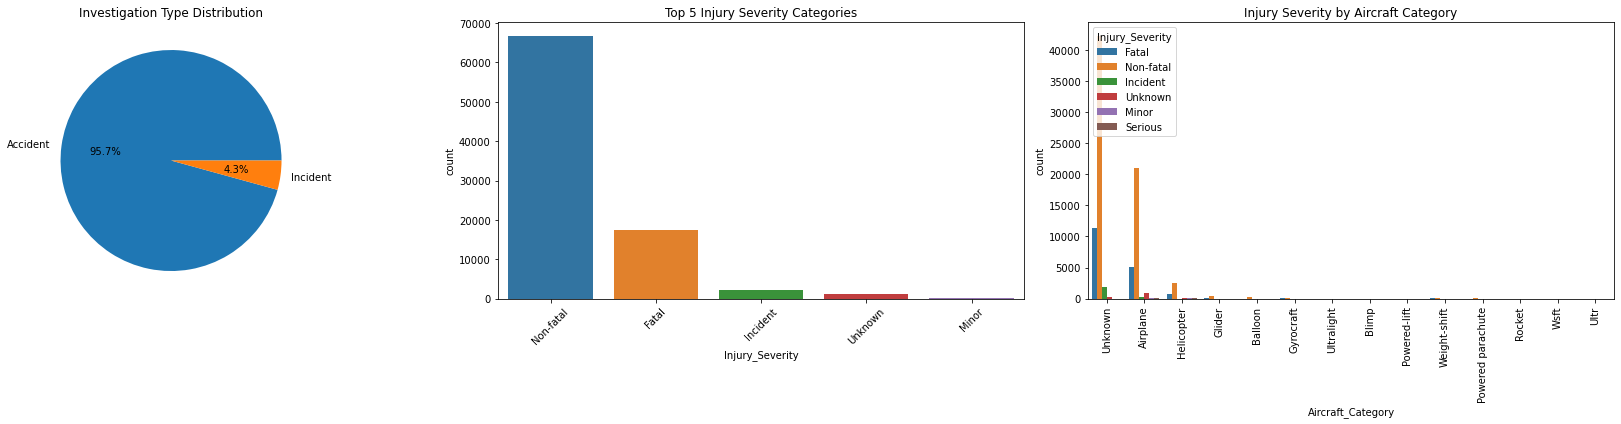

In [42]:
# Compute counts of each investigation type
investigation_counts = df['Investigation_Type'].value_counts()

# Get the top 5 injury categories based on count
top_5_categories = df['Injury_Severity'].value_counts().nlargest(5).index

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))  # Set figsize

# Pie chart for Investigation Type Distribution
ax1.pie(investigation_counts, labels=investigation_counts.index, autopct='%1.1f%%') # Label and automatically format the % label to 1 dp
ax1.set_title('Investigation Type Distribution')

# Injury severity distribution
sns.countplot(x='Injury_Severity', data=df, order=top_5_categories, ax=ax2)
ax2.set_title('Top 5 Injury Severity Categories')
ax2.tick_params(axis='x', rotation=45)

# Relationship between Aircraft Category and Injury Severity
sns.countplot(x='Aircraft_Category', hue='Injury_Severity', data=df, ax=ax3)
ax3.set_title('Injury Severity by Aircraft Category')
ax3.tick_params(axis='x', rotation=90)

# Display the plots
plt.tight_layout()
plt.show()

#### Observation: 
##### 19. Most of the events, ~96% are flight accidents
##### 20. Most accidents and incidents reported are `Non-Fatal` but `Fatal` incidents are also significant

### 2. Damages and injuries by `Weather Conditions` , `Aircraft build type`

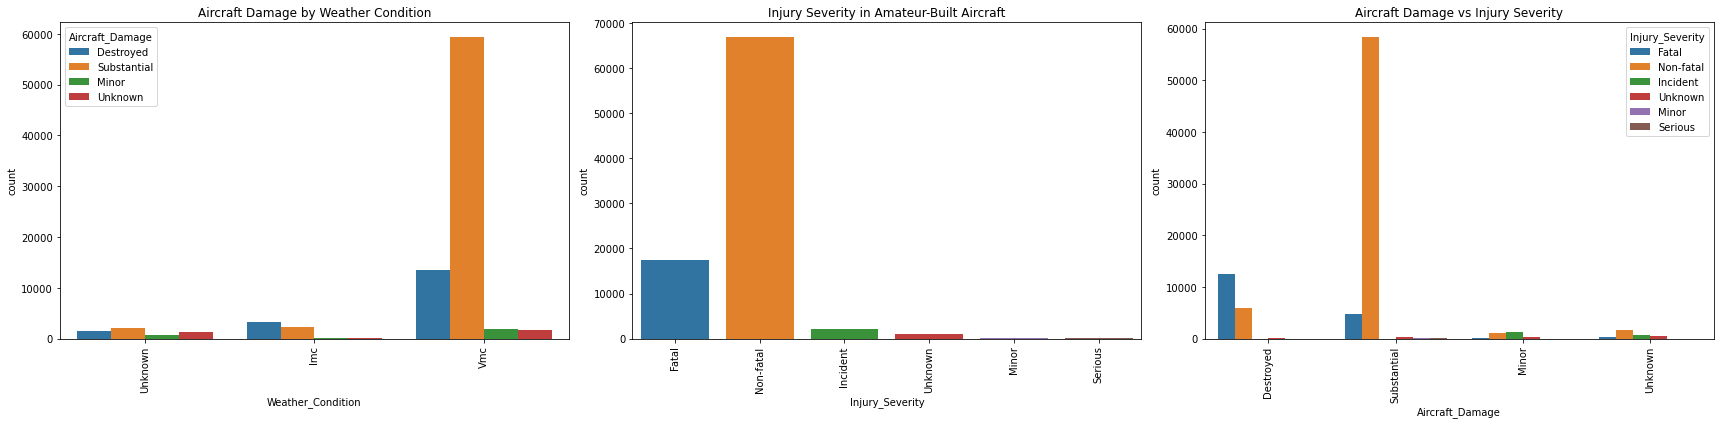

In [43]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))  # Set figsize

# Aircraft damage by weather condition
sns.countplot(x='Weather_Condition', hue='Aircraft_Damage', data=df, ax=ax1)
ax1.set_title('Aircraft Damage by Weather Condition')
ax1.tick_params(axis='x', rotation=90)

# Injury severity in amateur-built aircraft
amateur_built_accidents = df[df['Amateur_Built'].notna()]
sns.countplot(x='Injury_Severity', data=amateur_built_accidents, ax=ax2)
ax2.set_title('Injury Severity in Amateur-Built Aircraft')
ax2.tick_params(axis='x', rotation=90)

# Aircraft damage vs injury severity
sns.countplot(x='Aircraft_Damage', hue='Injury_Severity', data=df, ax=ax3)
ax3.set_title('Aircraft Damage vs Injury Severity')
ax3.tick_params(axis='x', rotation=90)

# Display
plt.tight_layout()
plt.show()

#### Observation: 
##### 21. In both `VMC` and `IMC` weather conditions, the aircrafts are either `Substancially damaged` or `Destroyed` completely. Even in both cases, majority of the injuries are non fatal, only increasingly fatal when the aircraft is destroyed. There is no diffrence between `Amateur Build` and others with regards to accident outcomes


### 3. Accidents and injuries by `Location`

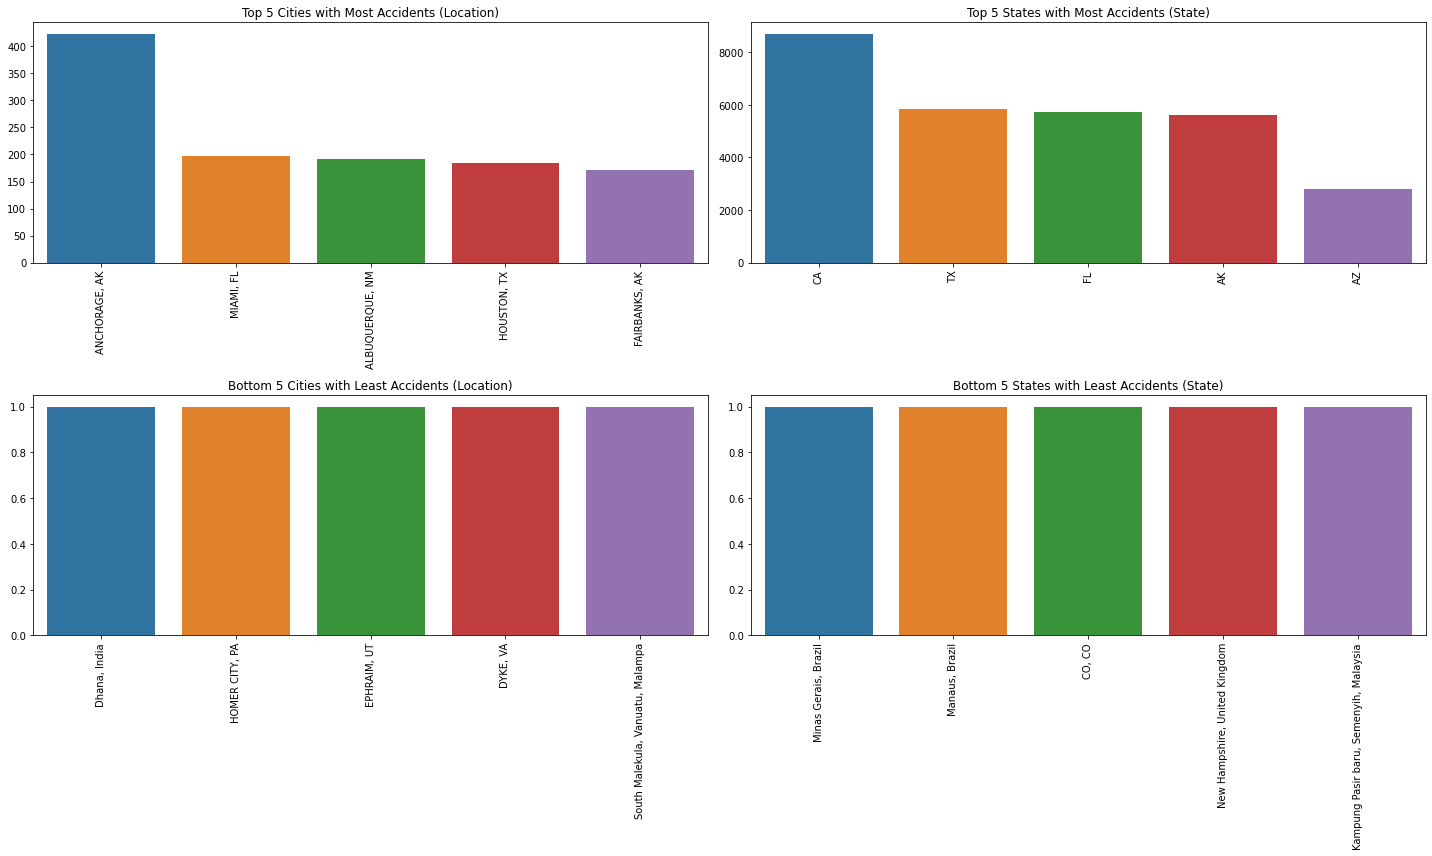

In [44]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))  # Set figsize
ax1, ax2, ax3, ax4 = axes.flatten()  # Flatten the 2x2 grid into a 1D axes

# Top 5 cities with most accidents
top_cities = df['Location'].value_counts().nlargest(5)
sns.barplot(x=top_cities.index, y=top_cities.values, ax=ax1)
ax1.set_title('Top 5 Cities with Most Accidents (Location)')
ax1.tick_params(axis='x', rotation=90)

# Top 5 states with most accidents
top_cities = df['State'].value_counts().nlargest(5)
sns.barplot(x=top_cities.index, y=top_cities.values, ax=ax2)
ax2.set_title('Top 5 States with Most Accidents (State)')
ax2.tick_params(axis='x', rotation=90)

# Bottom 5 cities with least accidents
top_cities = df['Location'].value_counts().nsmallest(5)
sns.barplot(x=top_cities.index, y=top_cities.values, ax=ax3)
ax3.set_title('Bottom 5 Cities with Least Accidents (Location)')
ax3.tick_params(axis='x', rotation=90)

# Bottom 5 states with least accidents
top_cities = df['State'].value_counts().nsmallest(5)
sns.barplot(x=top_cities.index, y=top_cities.values, ax=ax4)
ax4.set_title('Bottom 5 States with Least Accidents (State)')
ax4.tick_params(axis='x', rotation=90)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

#### Observation: 
##### 22. Most of the top 5 locations with the least accidents are outside the USA while all with the most accidents and incidents reported are in the USA

### 4. Accidents and fatalities by Aircraft `Make` and `Number of engines`

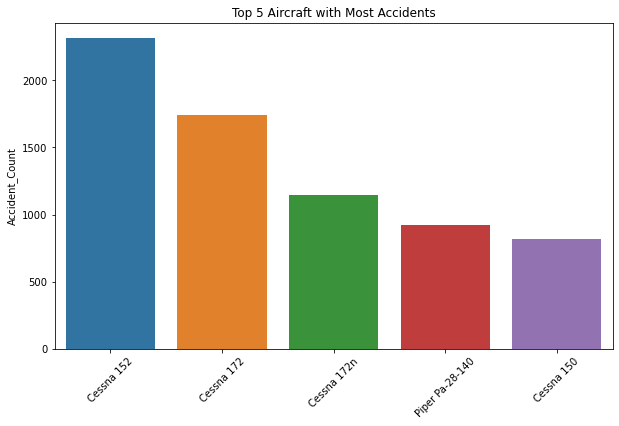

In [45]:

# Top 5 aircraft with most accidents
plt.figure(figsize=(10,6))
sns.barplot(x=top_5_most_accidents['Make'] + ' ' + top_5_most_accidents['Model'], y=top_5_most_accidents['Accident_Count']) #Concatenate the top 5 Make and Model with most acccidents and show event counts
plt.title('Top 5 Aircraft with Most Accidents')
plt.ylabel ='Accident Count'
plt.xticks(rotation=45)
plt.show()

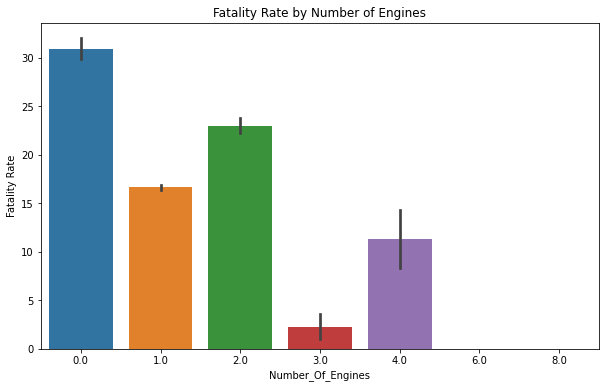

In [46]:
# Fatality rate by number of engines
plt.figure(figsize=(10,6))
sns.barplot(x='Number_Of_Engines', y='Fatality Rate', data=df)
plt.title('Fatality Rate by Number of Engines')
plt.xlabel='Number of Engines'
plt.ylabel='Fatality Rate'
plt.show()

#### Observation: 
##### 23. Most aircrafts that recored the highest fatality rates had either one or two engines

# Consolidating direct observarions
##### 1. `Cessna`, especially `Cessna 152` model has the highest number of accidents and incidents.
##### 2. `1st ftr gp` and especially `1st ftr gp, Focke-wulf 190 ` appears to be the safest aircraft generally 
##### 3. `Private Aircrafts` are the leading in accidents and incidents reported and investigated. The `Commercial Aircrafts` are also in top 5 types that report many accidents and incidents
##### 4. `Boeing` make of the Aircrafts and especially `Boeing 737` leads in total injuries and total fatal injuries reported and investigated. Generally the top 5 aircrafts recording most injuries from accidents are from `Boeing` aircraft manufacturing company.
##### 5. `Zwicker murray r` and especially  `Zwicker murray r, Glastar` model of aircrafts record the least injuries from accident 
##### 6. `Cessna` has the highest number of accidents and incidents including total injries reported both for Private and Commercial flights.
##### 7. `Yuneec` for commercial flights and  `Zwicker murray r ` make for private flights record the least accidents
##### 8. `Beech A36` for commercial and `Cessna 172` for private flights have the highest number of accidents and incidents.
##### 9. `Yuneec, Yuneec` for commercial flights and  `Zwicker murray r, Glastar ` model for private flights record the least accidents
##### 10. `Beech A36` model for commercial flights and `Piper` models, expecially `Pa-28-180`,`Pa-28-181` and `Pa-28-140` for private flights have the highest number of injuries from accidents and incidents. `Cessna` models seems to be among the top 5 models both for Commercial or Private flights recoding the most injuries.
##### 11. `Yuneec, Yuneec` for commercial flights and  `Zwicker murray r, Glastar ` model for private flights record the least injuries from accidents
##### 12. Most aircrafts that had the highest injuries recorded from accidents and incidents had `Reciprocating` Engine Type both for commercial and private aircrafts
##### 13. Aircrafts with `Turbo` Engine types recorded significantly lower injuries from accidents and incidents
##### 14. All aircrafts with `Reciprocating` engine types reporting accidents and incidents were of the `Cessna` make while the `Turbo` enfine types with the least accidents and incidents reported were of `Swearingen`, `Taylorcraft` and `Waco` makes
##### 15. `Reciprocating` engine types seem to report incidents and accidents in the mai 3 phases of flight: 'Takeof', 'Cruise' and 'Landing' both for Private and commerial aircrafts
##### 16. `Cessna` models especially `Cessna 172 series` record the highest accident and incident events while on the 'Landing' and 'Cruise' `Broad of Phase` of private flights 
##### 17. `Cessna` and `Piper` models especially `Cessna 180 series` and `Piper, Pa-18 series` record the highest accident and incident events while on the 'Landing' and 'Cruise' `Broad of Phase` of private flights mostly in airports in Alaska, AK State, especially in `Anchorage` City and in `VMC` weather condition. No incidents on takeoff
##### 18. `Swearingen` , `Thunder and colt` , and `Waco` aircraft makes and related models have the least reported accidents and incidents in takeoff, cruise and landing broad of phase for Commercial flights
##### 19. Most of the events, ~96% are flight accidents
##### 20. Most accidents and incidents reported are `Non-Fatal` but `Fatal` incidents are also significant
##### 21. In both `VMC` and `IMC` weather conditions, the aircrafts are either `Substancially damaged` or `Destroyed` completely. Even in both cases, majority of the injuries are non fatal, only increasingly fatal when the aircraft is destroyed.
##### 22. Most of the top 5 locations with the least accidents are outside the USA while all with the most accidents and incidents reported are in the USA
##### 23. Most aircrafts that recored the highest fatality rates had either one or two engines

# Summary of the observations

## Technical Summary
### Aircraft Model Distribution:

Cessna models, particularly the Cessna 152 and Cessna 172, have the highest number of accidents and incidents. Boeing aircraft, especially the Boeing 737, leads in total injuries and fatal injuries.
Aircraft models from Zwicker Murray R (Glastar) and Yuneec report the fewest accidents and injuries, with Yuneec being safer for commercial flights and Zwicker Murray R for private flights.

### Flight Type (Private vs. Commercial):

Private aircraft have a higher incidence of accidents and incidents compared to commercial flights, with the Cessna 172 and Piper models (e.g., Pa-28-180, Pa-28-181) being particularly accident-prone.
Commercial flights also see high numbers of accidents, with the Beech A36 model leading in accidents and injuries.

### Engine Types and Phases of Flight:

Aircraft with reciprocating engines have a higher number of accidents, particularly during takeoff, cruise, and landing phases. These accidents often involve Cessna models.
Turbo engine types, such as those from Swearingen, Taylorcraft, and Waco, report significantly fewer accidents.
Most accidents and injuries for private flights occur during the landing and cruise phases, particularly in VMC weather conditions, while commercial flights see fewer incidents during takeoff, cruise, and landing.

### Geographic Distribution:

The highest accident rates are reported in the USA, especially in airports in Alaska (e.g., Anchorage), while locations with the fewest accidents are predominantly outside the USA.

### Fatal vs. Non-Fatal Incidents:

Most accidents are non-fatal, but significant fatal incidents are recorded, especially when the aircraft is destroyed during the accident. In both VMC and IMC weather conditions, aircraft are often substantially damaged or destroyed, with increasing fatalities in the latter case.
Aircraft with one or two engines are more likely to record higher fatality rates.

## Non-Technical Summary
### Aircraft Safety:

Cessna planes, especially models like the Cessna 152 and 172, are involved in the highest number of accidents. On the other hand, planes like the Glastar and those made by Yuneec tend to be much safer, with fewer accidents and injuries reported.

### Private vs. Commercial Flights:

Private planes experience more accidents compared to commercial planes, but both types have models that are particularly accident-prone. For instance, the Cessna 172 for private flights and the Beech A36 for commercial flights are among those with the most incidents.

### Engine and Flight Conditions:

Planes with older, reciprocating engines are more likely to have accidents, especially during takeoff, cruising, and landing. In contrast, planes with more modern turbo engines seem to have fewer issues.
Private flights often face problems during landing and cruising, while commercial flights experience fewer issues overall during these phases.

### Accidents by Location:

Most accidents happen in the USA, with Alaska, particularly Anchorage, being a hotspot. However, the safest locations tend to be outside the USA.
Fatality Rates:

While most accidents don't result in fatalities, there are still a significant number of fatal crashes, especially when the aircraft is destroyed. Smaller planes with one or two engines tend to have higher fatality rates when things go wrong.

# Making sense of the observations and Business Decision Making
The goal is to identify low-risk aircraft for both commercial and private operations.

1. Aircraft Models to Avoid (High Risk)

Cessna (High Incidence of Accidents and Injuries)

Key Models:

Cessna 152 (most accident-prone)
Cessna 172 (high number of accidents and incidents for private flights)
Cessna 180 series (significant incidents in private aviation)

Risk Factors:

Cessna models consistently record the highest number of accidents and incidents, especially in private aviation. This suggests they may be riskier for new operators without in-depth knowledge of safety management.
High occurrence of accidents during the Landing and Cruise phases, particularly in adverse weather conditions or challenging geographies like Alaska.

Recommendation: Exercise caution when considering the purchase of Cessna models, especially for private operations. Although popular, they come with higher safety risks.


Piper (High Injuries)

Key Models:

Piper Pa-28-180, Pa-28-181, Pa-28-140 (record the highest number of injuries from accidents)

Risk Factors:

These Piper models, particularly in private flights, have a history of being involved in incidents that lead to a significant number of injuries.
Piper models tend to be among the top 5 aircrafts recording most injuries.

Recommendation: Even from literature, Piper models may be a poor fit for a company looking to minimize operational risks in the aviation sector.


Boeing (High Fatality Risks)

Key Models:

Boeing 737 (leads in both total and fatal injuries)


Risk Factors:
Boeing aircraft, particularly the 737 model, records the highest number of fatalities and serious injuries, indicating potential risk in commercial aviation.
Although Boeing is a well-established manufacturer, models like the 737 are involved in incidents that pose higher safety risks.

Recommendation: For a commercial operation, carefully evaluate the history of the specific Boeing model under consideration. While Boeing planes are reliable, some models (like the 737) have higher injury and fatality records.



2. Aircraft Models with Lower Risk (Recommended for Purchase)

Zwicker Murray R (Low Incidence of Accidents and Injuries)

Key Models:

Zwicker Murray R, Glastar (fewest injuries and accidents in private aviation)

Key Advantages:

This aircraft has one of the lowest accident and injury rates, making it a very safe option for private operations.
Suitable for private enterprises looking to minimize risk and ensure safer flights.

Recommendation: Highly recommended for private operations, especially if the company is new to aviation. The Glastar model could be a solid entry point into the private aircraft market.


Yuneec (Low Incidence of Accidents for Commercial Operations)

Key Models:

Yuneec (fewest accidents and incidents for commercial flights)

Key Advantages:

The Yuneec models, particularly for commercial use, demonstrate a low rate of incidents and accidents.
Ideal for companies seeking a low-risk aircraft for commercial operations.

Recommendation: Yuneec should be strongly considered for commercial aircraft purchases, as it offers a track record of safety with fewer accidents.


Swearingen, Thunder and Colt, Waco (Low Risk for Engine-Related Incidents)

Key Models:

Aircraft from Swearingen, Taylorcraft, Waco (low risk with Turbo engine types)

Key Advantages:

These aircraft brands use Turbo engine types, which have historically recorded significantly fewer accidents and incidents compared to reciprocating engines.
Safer for both commercial and private operations, as they are less prone to mechanical failures or accidents related to engine malfunctions.

Recommendation: Consider these models for either private or commercial use. Their lower accident and incident rates, especially during critical flight phases, make them excellent candidates for purchase.


3. Engine Type Considerations

Reciprocating Engines (Higher Risk)

Aircraft with Reciprocating engines, such as many Cessna models, are more prone to accidents, especially during the takeoff, cruise, and landing phases. These engines are often involved in the highest injury incidents.

Recommendation: Avoid aircraft with reciprocating engines, particularly in high-risk flight phases like takeoff and landing. If purchasing Cessna or Piper models, ensure thorough risk assessments and safety protocols.


Turbo Engines (Lower Risk)

Aircraft with Turbo engines, such as those made by Swearingen and Waco, show fewer accidents and incidents. This makes them a safer choice for both private and commercial operations.

Recommendation: Favor aircraft with turbo engines, as they have better safety records.


4. Flight Phases and Incident Risks

Landing and Cruise Phases: Most accidents and incidents for private flights occur during these phases, particularly with Cessna and Piper models. Alaska airports, especially in Anchorage, are hotspots for incidents during landing and cruise phases.
Weather Conditions (VMC and IMC): Accidents in both VMC (Visual Meteorological Conditions) and IMC (Instrument Meteorological Conditions) frequently result in substantial damage or complete destruction of aircraft, with non-fatal injuries being more common. However, fatalities increase significantly if the aircraft is destroyed.

Recommendation: Focus on aircraft models with strong safety performance in landing and cruise phases. Avoid aircraft with a history of problems in these phases, particularly for operations in challenging weather environments.


5. Geographic and Environmental Risks

Alaska (Anchorage) Risk: Data shows that certain areas, like Alaska, have a high incidence of accidents, particularly involving Cessna and Piper models during landing and cruise phases.
USA vs. Non-USA Accidents: Most accidents occur within the USA, while the safest areas tend to be outside the USA.

Recommendation: Carefully consider the operating geography. For operations in Alaska or other high-risk areas, choose aircraft models with excellent landing and cruise phase performance, such as those from Yuneec or Swearingen.


# Actionable Insights for Aircraft Purchase and Flight Operations

For Private Flights: Start with low-risk aircraft like the Zwicker Murray R, Glastar for private operations, given their excellent safety records and low accident rates.

For Commercial Flights: Consider Yuneec models for commercial operations due to their low incident rates and solid performance in accident prevention. Avoid high-risk models like the Boeing 737 and aircraft with reciprocating engines.

Engine Choice: Focus on Turbo engine aircraft, as they tend to be safer with fewer recorded accidents, especially during critical flight phases.

Geography Consideration: If operating in high-risk areas like Alaska, choose aircraft models that perform well in difficult conditions, such as Yuneec or Swearingen models.

It will be useful to use more advanced analysis techniques e.g ML algorithms like NLP to analyze the sentiments from the `Report Status` to pin point specific details leading to the reported accidents or incidents. This information is critical for aircraft purchase, assuming the cause was from a known mechanical problem with a partcular make or model of an aircraft. Additionally, this information will not only be good for recruitment of the crews but also in offering targeted training of flight crews, just to mention a few.